In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_py = pd.read_csv('resume_list_py.csv')

In [3]:
df_py.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags
0,Senior Python Developer,\r\nKARTHIK S\r\nPython developer\r\nContact: ...,Python Developer,KA HIK S Python developer Contact 469 Email a...,"['KA', 'HIK', 'S', 'Python', 'developer', 'Con...","['ka', 'hik', 's', 'python', 'developer', 'con...","['ka', 'hik', 'python', 'developer', 'contact'...","[('ka', 'NN'), ('hik', 'NN'), ('python', 'NN')..."
1,Python AWS Developer,\r\nVAMSI J\r\nPython AWS Developer\r\nContact...,Python Developer,VAMSI J Python AWS Developer Contact 469 Emai...,"['VAMSI', 'J', 'Python', 'AWS', 'Developer', '...","['vamsi', 'j', 'python', 'aws', 'developer', '...","['vamsi', 'j', 'python', 'aws', 'developer', '...","[('vamsi', 'NN'), ('j', 'NN'), ('python', 'NN'..."
2,Python Developer Hadoop,\r\nHarsha Vardhan Kalle\r\nEmail: adpk37@r.po...,Python Developer,Harsha Vardhan Kalle Email adpk37 210 Python ...,"['Harsha', 'Vardhan', 'Kalle', 'Email', 'adpk3...","['harsha', 'vardhan', 'kalle', 'email', 'adpk3...","['harsha', 'vardhan', 'kalle', 'email', 'adpk3...","[('harsha', 'NN'), ('vardhan', 'NN'), ('kalle'..."
3,Python developer,\r\nMOUNIKA\r\nSr. Python developer\r\nEmail: ...,Python Developer,MOUNIKA Sr Python developer Email ado5l0 Phon...,"['MOUNIKA', 'Sr', 'Python', 'developer', 'Emai...","['mounika', 'sr', 'python', 'developer', 'emai...","['mounika', 'sr', 'python', 'developer', 'emai...","[('mounika', 'FW'), ('sr', 'NN'), ('python', '..."
4,Python Developer,\r\nVAMSI J\r\nPython AWS Developer\r\nContact...,Python Developer,VAMSI J Python AWS Developer Contact 469 Emai...,"['VAMSI', 'J', 'Python', 'AWS', 'Developer', '...","['vamsi', 'j', 'python', 'aws', 'developer', '...","['vamsi', 'j', 'python', 'aws', 'developer', '...","[('vamsi', 'NN'), ('j', 'NN'), ('python', 'NN'..."


In [4]:
df_py["Category"] = "Python Developer"
df_py.to_csv("resume_list_py.csv", index=False)

In [5]:
df_py.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   job_title          100 non-null    object
 1   resume             100 non-null    object
 2   Category           100 non-null    object
 3   cleaned_resume     100 non-null    object
 4   tokenized          100 non-null    object
 5   lowercase          100 non-null    object
 6   stopwords_removed  100 non-null    object
 7   pos_tags           100 non-null    object
dtypes: object(8)
memory usage: 6.4+ KB


In [6]:
print ("Displaying the distinct categories of resume:\n\n ")
print (df_py['job_title'].unique())

Displaying the distinct categories of resume:

 
['Senior Python Developer' 'Python AWS Developer'
 'Python Developer Hadoop' 'Python developer' 'Python Developer'
 'Python Developer Network Administrator' 'Python Developer Panda'
 'Python Developer Administrative Assistant'
 'Python Developer University Of' 'Python Developer/ Data Analyst'
 'Python Developer Software Engineer' 'Jr. Python Developer'
 'Python Web Developer' 'Python Software Developer' 'Web Developer Python'
 'Software Developer (Java, Python, C, JavaScript, React)'
 'Software Developer Python' 'Developer using C# and Python.'
 'python developer' 'Developer Python'
 'Software developer Java, C, Python' 'Full Stack Python Developer'
 'Python Developer Machine Learning Engineer NLP Engineer'
 'Data Analyst, Data Engineer, Data Scientist, Python Developer'
 'Python SQL Developer, R Studio, Sas Jmp, Tableau, Microsoft Project'
 'Junior Python Developer' 'Python Developer, Machine Learning Engineer'
 'PL/SQL developer with P

In [7]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (df_py['job_title'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Python Developer                                                       30
Software Developer Python                                              19
Python Software Developer                                               8
Web Developer Python                                                    7
Developer Python                                                        5
Python developer                                                        3
python developer                                                        2
Python Developer University Of                                          1
Python Developer, Machine Learning Engineer                             1
Software Developer, Java, C++, Python, JavaScript, HTML, CSS            1
Python/Aws developer                                                    1
Senior Python Developer                                                 1
Budding Pyt

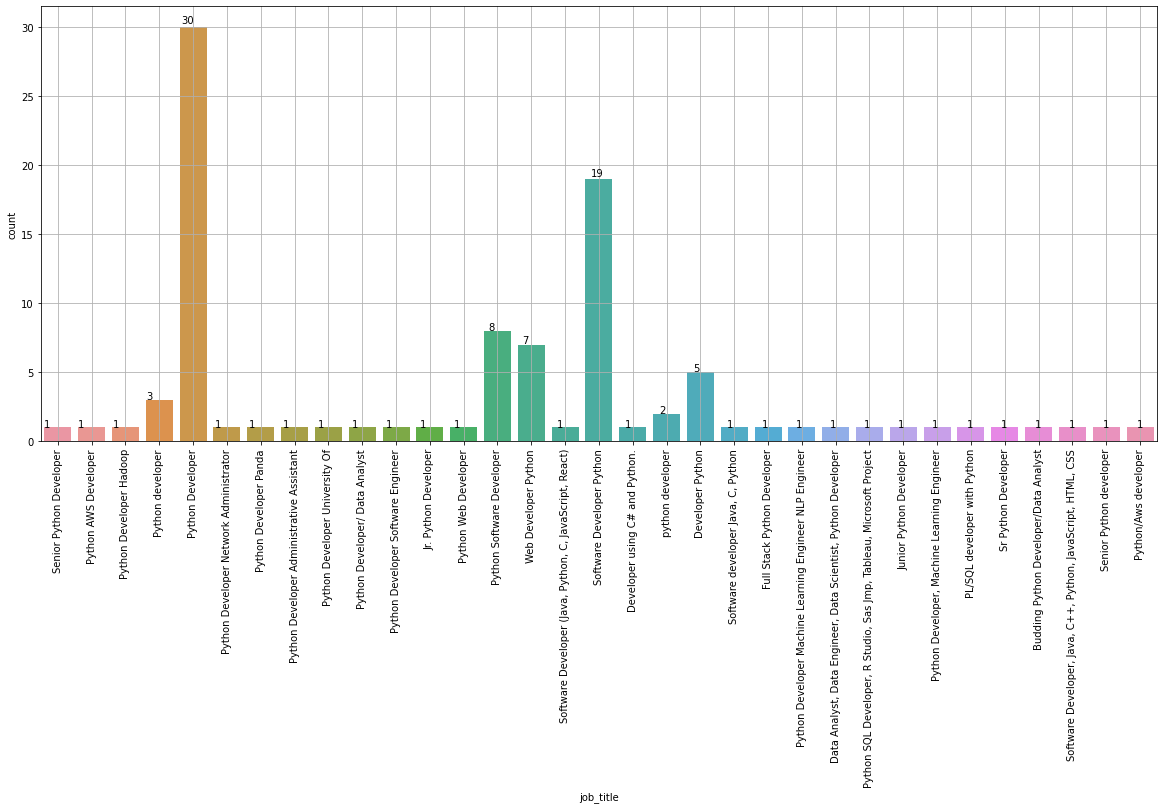

In [8]:
import seaborn as sns
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
ax=sns.countplot(x="job_title", data=df_py)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

In [9]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
df_py['cleaned_resume'] = df_py.resume.apply(lambda x: cleanResume(x))

In [10]:
df_py.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags
0,Senior Python Developer,\r\nKARTHIK S\r\nPython developer\r\nContact: ...,Python Developer,KA HIK S Python developer Contact 469 Email a...,"['KA', 'HIK', 'S', 'Python', 'developer', 'Con...","['ka', 'hik', 's', 'python', 'developer', 'con...","['ka', 'hik', 'python', 'developer', 'contact'...","[('ka', 'NN'), ('hik', 'NN'), ('python', 'NN')..."
1,Python AWS Developer,\r\nVAMSI J\r\nPython AWS Developer\r\nContact...,Python Developer,VAMSI J Python AWS Developer Contact 469 Emai...,"['VAMSI', 'J', 'Python', 'AWS', 'Developer', '...","['vamsi', 'j', 'python', 'aws', 'developer', '...","['vamsi', 'j', 'python', 'aws', 'developer', '...","[('vamsi', 'NN'), ('j', 'NN'), ('python', 'NN'..."
2,Python Developer Hadoop,\r\nHarsha Vardhan Kalle\r\nEmail: adpk37@r.po...,Python Developer,Harsha Vardhan Kalle Email adpk37 210 Python ...,"['Harsha', 'Vardhan', 'Kalle', 'Email', 'adpk3...","['harsha', 'vardhan', 'kalle', 'email', 'adpk3...","['harsha', 'vardhan', 'kalle', 'email', 'adpk3...","[('harsha', 'NN'), ('vardhan', 'NN'), ('kalle'..."
3,Python developer,\r\nMOUNIKA\r\nSr. Python developer\r\nEmail: ...,Python Developer,MOUNIKA Sr Python developer Email ado5l0 Phon...,"['MOUNIKA', 'Sr', 'Python', 'developer', 'Emai...","['mounika', 'sr', 'python', 'developer', 'emai...","['mounika', 'sr', 'python', 'developer', 'emai...","[('mounika', 'FW'), ('sr', 'NN'), ('python', '..."
4,Python Developer,\r\nVAMSI J\r\nPython AWS Developer\r\nContact...,Python Developer,VAMSI J Python AWS Developer Contact 469 Emai...,"['VAMSI', 'J', 'Python', 'AWS', 'Developer', '...","['vamsi', 'j', 'python', 'aws', 'developer', '...","['vamsi', 'j', 'python', 'aws', 'developer', '...","[('vamsi', 'NN'), ('j', 'NN'), ('python', 'NN'..."


In [11]:
import nltk
import string
from nltk.tokenize import word_tokenize

In [12]:
df_py['tokenized'] = df_py['cleaned_resume'].apply(word_tokenize)
df_py.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags
0,Senior Python Developer,\r\nKARTHIK S\r\nPython developer\r\nContact: ...,Python Developer,KA HIK S Python developer Contact 469 Email a...,"[KA, HIK, S, Python, developer, Contact, 469, ...","['ka', 'hik', 's', 'python', 'developer', 'con...","['ka', 'hik', 'python', 'developer', 'contact'...","[('ka', 'NN'), ('hik', 'NN'), ('python', 'NN')..."
1,Python AWS Developer,\r\nVAMSI J\r\nPython AWS Developer\r\nContact...,Python Developer,VAMSI J Python AWS Developer Contact 469 Emai...,"[VAMSI, J, Python, AWS, Developer, Contact, 46...","['vamsi', 'j', 'python', 'aws', 'developer', '...","['vamsi', 'j', 'python', 'aws', 'developer', '...","[('vamsi', 'NN'), ('j', 'NN'), ('python', 'NN'..."
2,Python Developer Hadoop,\r\nHarsha Vardhan Kalle\r\nEmail: adpk37@r.po...,Python Developer,Harsha Vardhan Kalle Email adpk37 210 Python ...,"[Harsha, Vardhan, Kalle, Email, adpk37, 210, P...","['harsha', 'vardhan', 'kalle', 'email', 'adpk3...","['harsha', 'vardhan', 'kalle', 'email', 'adpk3...","[('harsha', 'NN'), ('vardhan', 'NN'), ('kalle'..."
3,Python developer,\r\nMOUNIKA\r\nSr. Python developer\r\nEmail: ...,Python Developer,MOUNIKA Sr Python developer Email ado5l0 Phon...,"[MOUNIKA, Sr, Python, developer, Email, ado5l0...","['mounika', 'sr', 'python', 'developer', 'emai...","['mounika', 'sr', 'python', 'developer', 'emai...","[('mounika', 'FW'), ('sr', 'NN'), ('python', '..."
4,Python Developer,\r\nVAMSI J\r\nPython AWS Developer\r\nContact...,Python Developer,VAMSI J Python AWS Developer Contact 469 Emai...,"[VAMSI, J, Python, AWS, Developer, Contact, 46...","['vamsi', 'j', 'python', 'aws', 'developer', '...","['vamsi', 'j', 'python', 'aws', 'developer', '...","[('vamsi', 'NN'), ('j', 'NN'), ('python', 'NN'..."


In [13]:
df_py['lowercase'] = df_py['tokenized'].apply(lambda x: [word.lower() for word in x])
df_py.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags
0,Senior Python Developer,\r\nKARTHIK S\r\nPython developer\r\nContact: ...,Python Developer,KA HIK S Python developer Contact 469 Email a...,"[KA, HIK, S, Python, developer, Contact, 469, ...","[ka, hik, s, python, developer, contact, 469, ...","['ka', 'hik', 'python', 'developer', 'contact'...","[('ka', 'NN'), ('hik', 'NN'), ('python', 'NN')..."
1,Python AWS Developer,\r\nVAMSI J\r\nPython AWS Developer\r\nContact...,Python Developer,VAMSI J Python AWS Developer Contact 469 Emai...,"[VAMSI, J, Python, AWS, Developer, Contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","['vamsi', 'j', 'python', 'aws', 'developer', '...","[('vamsi', 'NN'), ('j', 'NN'), ('python', 'NN'..."
2,Python Developer Hadoop,\r\nHarsha Vardhan Kalle\r\nEmail: adpk37@r.po...,Python Developer,Harsha Vardhan Kalle Email adpk37 210 Python ...,"[Harsha, Vardhan, Kalle, Email, adpk37, 210, P...","[harsha, vardhan, kalle, email, adpk37, 210, p...","['harsha', 'vardhan', 'kalle', 'email', 'adpk3...","[('harsha', 'NN'), ('vardhan', 'NN'), ('kalle'..."
3,Python developer,\r\nMOUNIKA\r\nSr. Python developer\r\nEmail: ...,Python Developer,MOUNIKA Sr Python developer Email ado5l0 Phon...,"[MOUNIKA, Sr, Python, developer, Email, ado5l0...","[mounika, sr, python, developer, email, ado5l0...","['mounika', 'sr', 'python', 'developer', 'emai...","[('mounika', 'FW'), ('sr', 'NN'), ('python', '..."
4,Python Developer,\r\nVAMSI J\r\nPython AWS Developer\r\nContact...,Python Developer,VAMSI J Python AWS Developer Contact 469 Emai...,"[VAMSI, J, Python, AWS, Developer, Contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","['vamsi', 'j', 'python', 'aws', 'developer', '...","[('vamsi', 'NN'), ('j', 'NN'), ('python', 'NN'..."


In [14]:
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

In [15]:
stop_words = set(stopwords.words('english'))
df_py['stopwords_removed'] = df_py['lowercase'].apply(lambda x: [word for word in x if word not in stop_words])
df_py.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags
0,Senior Python Developer,\r\nKARTHIK S\r\nPython developer\r\nContact: ...,Python Developer,KA HIK S Python developer Contact 469 Email a...,"[KA, HIK, S, Python, developer, Contact, 469, ...","[ka, hik, s, python, developer, contact, 469, ...","[ka, hik, python, developer, contact, 469, ema...","[('ka', 'NN'), ('hik', 'NN'), ('python', 'NN')..."
1,Python AWS Developer,\r\nVAMSI J\r\nPython AWS Developer\r\nContact...,Python Developer,VAMSI J Python AWS Developer Contact 469 Emai...,"[VAMSI, J, Python, AWS, Developer, Contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","[('vamsi', 'NN'), ('j', 'NN'), ('python', 'NN'..."
2,Python Developer Hadoop,\r\nHarsha Vardhan Kalle\r\nEmail: adpk37@r.po...,Python Developer,Harsha Vardhan Kalle Email adpk37 210 Python ...,"[Harsha, Vardhan, Kalle, Email, adpk37, 210, P...","[harsha, vardhan, kalle, email, adpk37, 210, p...","[harsha, vardhan, kalle, email, adpk37, 210, p...","[('harsha', 'NN'), ('vardhan', 'NN'), ('kalle'..."
3,Python developer,\r\nMOUNIKA\r\nSr. Python developer\r\nEmail: ...,Python Developer,MOUNIKA Sr Python developer Email ado5l0 Phon...,"[MOUNIKA, Sr, Python, developer, Email, ado5l0...","[mounika, sr, python, developer, email, ado5l0...","[mounika, sr, python, developer, email, ado5l0...","[('mounika', 'FW'), ('sr', 'NN'), ('python', '..."
4,Python Developer,\r\nVAMSI J\r\nPython AWS Developer\r\nContact...,Python Developer,VAMSI J Python AWS Developer Contact 469 Emai...,"[VAMSI, J, Python, AWS, Developer, Contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","[('vamsi', 'NN'), ('j', 'NN'), ('python', 'NN'..."


In [16]:
df_py['pos_tags'] = df_py['stopwords_removed'].apply(nltk.tag.pos_tag)
df_py.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags
0,Senior Python Developer,\r\nKARTHIK S\r\nPython developer\r\nContact: ...,Python Developer,KA HIK S Python developer Contact 469 Email a...,"[KA, HIK, S, Python, developer, Contact, 469, ...","[ka, hik, s, python, developer, contact, 469, ...","[ka, hik, python, developer, contact, 469, ema...","[(ka, NN), (hik, NN), (python, NN), (developer..."
1,Python AWS Developer,\r\nVAMSI J\r\nPython AWS Developer\r\nContact...,Python Developer,VAMSI J Python AWS Developer Contact 469 Emai...,"[VAMSI, J, Python, AWS, Developer, Contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","[(vamsi, NN), (j, NN), (python, NN), (aws, VBZ..."
2,Python Developer Hadoop,\r\nHarsha Vardhan Kalle\r\nEmail: adpk37@r.po...,Python Developer,Harsha Vardhan Kalle Email adpk37 210 Python ...,"[Harsha, Vardhan, Kalle, Email, adpk37, 210, P...","[harsha, vardhan, kalle, email, adpk37, 210, p...","[harsha, vardhan, kalle, email, adpk37, 210, p...","[(harsha, NN), (vardhan, NN), (kalle, VBD), (e..."
3,Python developer,\r\nMOUNIKA\r\nSr. Python developer\r\nEmail: ...,Python Developer,MOUNIKA Sr Python developer Email ado5l0 Phon...,"[MOUNIKA, Sr, Python, developer, Email, ado5l0...","[mounika, sr, python, developer, email, ado5l0...","[mounika, sr, python, developer, email, ado5l0...","[(mounika, FW), (sr, NN), (python, NN), (devel..."
4,Python Developer,\r\nVAMSI J\r\nPython AWS Developer\r\nContact...,Python Developer,VAMSI J Python AWS Developer Contact 469 Emai...,"[VAMSI, J, Python, AWS, Developer, Contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","[(vamsi, NN), (j, NN), (python, NN), (aws, VBZ..."


In [17]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
df_py['wordnet_pos'] = df_py['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df_py.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags,wordnet_pos
0,Senior Python Developer,\r\nKARTHIK S\r\nPython developer\r\nContact: ...,Python Developer,KA HIK S Python developer Contact 469 Email a...,"[KA, HIK, S, Python, developer, Contact, 469, ...","[ka, hik, s, python, developer, contact, 469, ...","[ka, hik, python, developer, contact, 469, ema...","[(ka, NN), (hik, NN), (python, NN), (developer...","[(ka, n), (hik, n), (python, n), (developer, n..."
1,Python AWS Developer,\r\nVAMSI J\r\nPython AWS Developer\r\nContact...,Python Developer,VAMSI J Python AWS Developer Contact 469 Emai...,"[VAMSI, J, Python, AWS, Developer, Contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","[(vamsi, NN), (j, NN), (python, NN), (aws, VBZ...","[(vamsi, n), (j, n), (python, n), (aws, v), (d..."
2,Python Developer Hadoop,\r\nHarsha Vardhan Kalle\r\nEmail: adpk37@r.po...,Python Developer,Harsha Vardhan Kalle Email adpk37 210 Python ...,"[Harsha, Vardhan, Kalle, Email, adpk37, 210, P...","[harsha, vardhan, kalle, email, adpk37, 210, p...","[harsha, vardhan, kalle, email, adpk37, 210, p...","[(harsha, NN), (vardhan, NN), (kalle, VBD), (e...","[(harsha, n), (vardhan, n), (kalle, v), (email..."
3,Python developer,\r\nMOUNIKA\r\nSr. Python developer\r\nEmail: ...,Python Developer,MOUNIKA Sr Python developer Email ado5l0 Phon...,"[MOUNIKA, Sr, Python, developer, Email, ado5l0...","[mounika, sr, python, developer, email, ado5l0...","[mounika, sr, python, developer, email, ado5l0...","[(mounika, FW), (sr, NN), (python, NN), (devel...","[(mounika, n), (sr, n), (python, n), (develope..."
4,Python Developer,\r\nVAMSI J\r\nPython AWS Developer\r\nContact...,Python Developer,VAMSI J Python AWS Developer Contact 469 Emai...,"[VAMSI, J, Python, AWS, Developer, Contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","[(vamsi, NN), (j, NN), (python, NN), (aws, VBZ...","[(vamsi, n), (j, n), (python, n), (aws, v), (d..."


In [18]:
from nltk.stem import WordNetLemmatizer

In [19]:
wnl = WordNetLemmatizer()
df_py['lemmatized'] = df_py['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
df_py.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,Senior Python Developer,\r\nKARTHIK S\r\nPython developer\r\nContact: ...,Python Developer,KA HIK S Python developer Contact 469 Email a...,"[KA, HIK, S, Python, developer, Contact, 469, ...","[ka, hik, s, python, developer, contact, 469, ...","[ka, hik, python, developer, contact, 469, ema...","[(ka, NN), (hik, NN), (python, NN), (developer...","[(ka, n), (hik, n), (python, n), (developer, n...","[ka, hik, python, developer, contact, 469, ema..."
1,Python AWS Developer,\r\nVAMSI J\r\nPython AWS Developer\r\nContact...,Python Developer,VAMSI J Python AWS Developer Contact 469 Emai...,"[VAMSI, J, Python, AWS, Developer, Contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","[(vamsi, NN), (j, NN), (python, NN), (aws, VBZ...","[(vamsi, n), (j, n), (python, n), (aws, v), (d...","[vamsi, j, python, aws, developer, contact, 46..."
2,Python Developer Hadoop,\r\nHarsha Vardhan Kalle\r\nEmail: adpk37@r.po...,Python Developer,Harsha Vardhan Kalle Email adpk37 210 Python ...,"[Harsha, Vardhan, Kalle, Email, adpk37, 210, P...","[harsha, vardhan, kalle, email, adpk37, 210, p...","[harsha, vardhan, kalle, email, adpk37, 210, p...","[(harsha, NN), (vardhan, NN), (kalle, VBD), (e...","[(harsha, n), (vardhan, n), (kalle, v), (email...","[harsha, vardhan, kalle, email, adpk37, 210, p..."
3,Python developer,\r\nMOUNIKA\r\nSr. Python developer\r\nEmail: ...,Python Developer,MOUNIKA Sr Python developer Email ado5l0 Phon...,"[MOUNIKA, Sr, Python, developer, Email, ado5l0...","[mounika, sr, python, developer, email, ado5l0...","[mounika, sr, python, developer, email, ado5l0...","[(mounika, FW), (sr, NN), (python, NN), (devel...","[(mounika, n), (sr, n), (python, n), (develope...","[mounika, sr, python, developer, email, ado5l0..."
4,Python Developer,\r\nVAMSI J\r\nPython AWS Developer\r\nContact...,Python Developer,VAMSI J Python AWS Developer Contact 469 Emai...,"[VAMSI, J, Python, AWS, Developer, Contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","[(vamsi, NN), (j, NN), (python, NN), (aws, VBZ...","[(vamsi, n), (j, n), (python, n), (aws, v), (d...","[vamsi, j, python, aws, developer, contact, 46..."


In [20]:
import docx2txt

In [21]:
job_desc = docx2txt.process("job_descp_py.docx")
print(job_desc)

A Python Developer is responsible for coding, designing, deploying, and debugging development projects, typically on the server-side (or back-end). They may, however, also help organizations with their technological framework.

A Python Developer’s role can span a wide variety of duties. You might be asked to create an application for your employer, design the framework for your code, build tools as necessary to get the job done, create websites, or publish new services. A Python Developer often works in close collaboration with data collection and analytics to create useful answers to questions and provide valuable insight.

Like most programming positions, the specifics of this job vary based on the needs of your employer. Some Python Developers work as independent contractors instead of being exclusive to one company.


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
def skill_check(text_df):
    text = [text_df,job_desc]
    cv = CountVectorizer()
    count_matrix = cv.fit_transform(text)
    match = cosine_similarity(count_matrix)[0][1]
    match = match*100
    match = round(match,2)
    match = match+20
    return match

df_py['Right_fit_Score'] = df_py.cleaned_resume.apply(lambda x: skill_check(x))

    
df_py.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags,wordnet_pos,lemmatized,Right_fit_Score
0,Senior Python Developer,\r\nKARTHIK S\r\nPython developer\r\nContact: ...,Python Developer,KA HIK S Python developer Contact 469 Email a...,"[KA, HIK, S, Python, developer, Contact, 469, ...","[ka, hik, s, python, developer, contact, 469, ...","[ka, hik, python, developer, contact, 469, ema...","[(ka, NN), (hik, NN), (python, NN), (developer...","[(ka, n), (hik, n), (python, n), (developer, n...","[ka, hik, python, developer, contact, 469, ema...",73.40
1,Python AWS Developer,\r\nVAMSI J\r\nPython AWS Developer\r\nContact...,Python Developer,VAMSI J Python AWS Developer Contact 469 Emai...,"[VAMSI, J, Python, AWS, Developer, Contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","[(vamsi, NN), (j, NN), (python, NN), (aws, VBZ...","[(vamsi, n), (j, n), (python, n), (aws, v), (d...","[vamsi, j, python, aws, developer, contact, 46...",71.50
2,Python Developer Hadoop,\r\nHarsha Vardhan Kalle\r\nEmail: adpk37@r.po...,Python Developer,Harsha Vardhan Kalle Email adpk37 210 Python ...,"[Harsha, Vardhan, Kalle, Email, adpk37, 210, P...","[harsha, vardhan, kalle, email, adpk37, 210, p...","[harsha, vardhan, kalle, email, adpk37, 210, p...","[(harsha, NN), (vardhan, NN), (kalle, VBD), (e...","[(harsha, n), (vardhan, n), (kalle, v), (email...","[harsha, vardhan, kalle, email, adpk37, 210, p...",74.95
3,Python developer,\r\nMOUNIKA\r\nSr. Python developer\r\nEmail: ...,Python Developer,MOUNIKA Sr Python developer Email ado5l0 Phon...,"[MOUNIKA, Sr, Python, developer, Email, ado5l0...","[mounika, sr, python, developer, email, ado5l0...","[mounika, sr, python, developer, email, ado5l0...","[(mounika, FW), (sr, NN), (python, NN), (devel...","[(mounika, n), (sr, n), (python, n), (develope...","[mounika, sr, python, developer, email, ado5l0...",69.23
4,Python Developer,\r\nVAMSI J\r\nPython AWS Developer\r\nContact...,Python Developer,VAMSI J Python AWS Developer Contact 469 Emai...,"[VAMSI, J, Python, AWS, Developer, Contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","[(vamsi, NN), (j, NN), (python, NN), (aws, VBZ...","[(vamsi, n), (j, n), (python, n), (aws, v), (d...","[vamsi, j, python, aws, developer, contact, 46...",73.02


In [24]:
df_py['Right_fit_Score'].max()

76.34

In [25]:
skill = docx2txt.process("skill_py.docx")
print(skill)

Django, Python, APIs ,PostgreSQL, Git, AWS, Docker, REST, NoSQL, MySQL, JavaScript, Jenkins


In [26]:
def skill_check(text_df):
    text = [text_df,skill]
    cv = CountVectorizer()
    count_matrix = cv.fit_transform(text)
    match = cosine_similarity(count_matrix)[0][1]
    match = match*100
    match = round(match,2)
    match = match+40
    return match

df_py['skill_fit_Score'] = df_py.cleaned_resume.apply(lambda x: skill_check(x))

    
df_py.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags,wordnet_pos,lemmatized,Right_fit_Score,skill_fit_Score
0,Senior Python Developer,\r\nKARTHIK S\r\nPython developer\r\nContact: ...,Python Developer,KA HIK S Python developer Contact 469 Email a...,"[KA, HIK, S, Python, developer, Contact, 469, ...","[ka, hik, s, python, developer, contact, 469, ...","[ka, hik, python, developer, contact, 469, ema...","[(ka, NN), (hik, NN), (python, NN), (developer...","[(ka, n), (hik, n), (python, n), (developer, n...","[ka, hik, python, developer, contact, 469, ema...",73.40,55.15
1,Python AWS Developer,\r\nVAMSI J\r\nPython AWS Developer\r\nContact...,Python Developer,VAMSI J Python AWS Developer Contact 469 Emai...,"[VAMSI, J, Python, AWS, Developer, Contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","[(vamsi, NN), (j, NN), (python, NN), (aws, VBZ...","[(vamsi, n), (j, n), (python, n), (aws, v), (d...","[vamsi, j, python, aws, developer, contact, 46...",71.50,60.33
2,Python Developer Hadoop,\r\nHarsha Vardhan Kalle\r\nEmail: adpk37@r.po...,Python Developer,Harsha Vardhan Kalle Email adpk37 210 Python ...,"[Harsha, Vardhan, Kalle, Email, adpk37, 210, P...","[harsha, vardhan, kalle, email, adpk37, 210, p...","[harsha, vardhan, kalle, email, adpk37, 210, p...","[(harsha, NN), (vardhan, NN), (kalle, VBD), (e...","[(harsha, n), (vardhan, n), (kalle, v), (email...","[harsha, vardhan, kalle, email, adpk37, 210, p...",74.95,57.56
3,Python developer,\r\nMOUNIKA\r\nSr. Python developer\r\nEmail: ...,Python Developer,MOUNIKA Sr Python developer Email ado5l0 Phon...,"[MOUNIKA, Sr, Python, developer, Email, ado5l0...","[mounika, sr, python, developer, email, ado5l0...","[mounika, sr, python, developer, email, ado5l0...","[(mounika, FW), (sr, NN), (python, NN), (devel...","[(mounika, n), (sr, n), (python, n), (develope...","[mounika, sr, python, developer, email, ado5l0...",69.23,61.71
4,Python Developer,\r\nVAMSI J\r\nPython AWS Developer\r\nContact...,Python Developer,VAMSI J Python AWS Developer Contact 469 Emai...,"[VAMSI, J, Python, AWS, Developer, Contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","[vamsi, j, python, aws, developer, contact, 46...","[(vamsi, NN), (j, NN), (python, NN), (aws, VBZ...","[(vamsi, n), (j, n), (python, n), (aws, v), (d...","[vamsi, j, python, aws, developer, contact, 46...",73.02,59.79


In [27]:
df_py['skill_fit_Score'].max()

72.2